In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df.job_posted_date)
df["job_skills"]=df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Hassaan Yousaf\anaconda3\envs\pythonproj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Hassaan Yousaf\AppData\Local\Temp\ipykernel_17228\3512889914.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=jobs, vert=False)


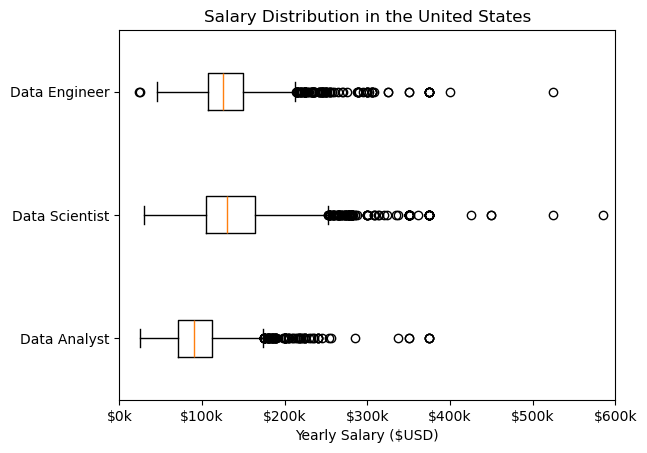

In [21]:
jobs=['Data Analyst', 'Data Scientist', 'Data Engineer'] 
df_US= df[(df['job_title_short'].isin(jobs))& (df['job_country']=='United States')].copy()
df_US=df_US.dropna(subset='salary_year_avg')
job_list = [df_US[df_US['job_title_short'] == job]['salary_year_avg'] for job in jobs]
plt.boxplot(job_list, labels=jobs, vert=False)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.xlim(0,600000)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.show()